## Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The dataset given contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

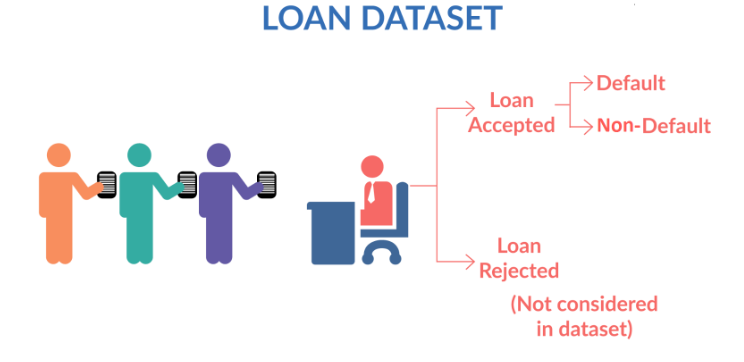

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    a. Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

    b. Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    c. Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 


2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Case Study Objectives via EDA

• Determine the factors and attributes that contribute to Bad Loans.

• Determine grouped factors that contribute to Bad Loans.

• Analyse both Bad Loan Average and Number of Bad Loans.

In [ ]:
pip install plotly

In [ ]:
## Ignore Warings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df = pd.read_csv("../input/lending-loan-club-dataset/loan.csv")
type(df)

## DATA UNDERSTANDING

In [ ]:
# Understanding what each column represents , and also what each row/data point represents
df.head()

In [ ]:
#rows x columns
df.shape

In [ ]:
#data type of each variable
#categorical: object - strings
#numeric: float64, int64 - numbers
#time based variables : timestamp- datetime data type
#is the data type of the variable consistent with its variable description?
df.dtypes

In [ ]:
# Display columns missing values %
round(100*(df.isnull().sum()/len(df.index)),2)

## DATA CLEANING

In [ ]:
print(df.id.nunique())
print(df.member_id.nunique())
# Both columns have same number of unique values; Drop one of the columns
df = df.drop(['member_id'], axis=1)

In [ ]:
# Drop columns having all nans
df = df.dropna(how='all', axis=1)

# Drop columns - mths_since_last_delinq,mths_since_last_record,next_pymnt_d having more than 30% nans
df = df.drop(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis=1)

# Drop pymnt_plan column; only value in that column is n
print(df['pymnt_plan'].value_counts(),"\n")
df = df.drop(['pymnt_plan'], axis=1)

# Drop collections_12_mths_ex_med column; only values in that column are 0 and NA
print(df['collections_12_mths_ex_med'].value_counts(),"\n")
df = df.drop(['collections_12_mths_ex_med'], axis=1)

# Drop policy_code column; only value in that column is 1
print(df['policy_code'].value_counts(),"\n")
df = df.drop(['policy_code'], axis=1)

# Drop application_type column; only value in that column is INDIVIDUAL
print(df['application_type'].value_counts(),"\n")
df = df.drop(['application_type'], axis=1)

# Drop acc_now_delinq column; only value in that column is 0
print(df['acc_now_delinq'].value_counts(),"\n")
df = df.drop(['acc_now_delinq'], axis=1)

# Drop corresponding delinq_amnt column; only value in that column is also 0
print(df['delinq_amnt'].value_counts(),"\n")
df = df.drop(['delinq_amnt'], axis=1)

# Drop tax_liens column; only values in that column are 0 and NA
print(df['tax_liens'].value_counts(),"\n")
df = df.drop(['tax_liens'], axis=1)

# Drop chargeoff_within_12_mths column; only values in that column is 0
print(df['chargeoff_within_12_mths'].value_counts(),"\n")
df = df.drop(['chargeoff_within_12_mths'], axis=1)

# Drop initial_list_status column; only value in that column is F
print(df['initial_list_status'].value_counts(),"\n")
df = df.drop(['initial_list_status'], axis=1)

In [ ]:
# Drop url column; it does not hold significance in analysis 
df = df.drop(['url'], axis=1)

# Drop desc column; Instead of desc, we can use purpose for analysis
df = df.drop(['desc'], axis=1)

# Drop title and emp_title column; Not significant for analysis
df = df.drop(['emp_title','title'], axis=1)

## Derive target column which is loan_status

In [ ]:
# Remove rows which have loan status as current as our target column values are Fully Paid and Charged Off
df = df.loc[(df.loan_status != 'Current'), :]

# Replace loan_status column values of Full Paid with 0 and Charged Off (or Defaulters) with 1
df.loan_status[df.loan_status == 'Fully Paid'] = 0
df.loan_status[df.loan_status == 'Charged Off'] = 1

df['loan_status'] = df['loan_status'].astype("int64")

In [ ]:
# There are 3 values in home_ownership with value of NONE; We can impute NONE to OTHER
print(df['home_ownership'].value_counts(),"\n")
df['home_ownership'] = df['home_ownership'].replace('NONE', 'OTHER')

# Remove trailing xx in zip code column
print(df['zip_code'].head())
df['zip_code'] = df[['zip_code']].applymap(lambda x:str(x).rstrip('xx'))

# Remove trailing months from term column and rename column as term_in_months
print()
print(df['term'].head())
df['term'] = df[['term']].applymap(lambda x:str(x).rstrip('months'))
df['term'] = df['term'].astype('int64')
df.rename(columns={'term':'term_in_months'},inplace=True)

# Remove trailing % sign in int_rate and rename int_rate column as int_rate_percent
print()
print(df['int_rate'].head())
df['int_rate'] = df[['int_rate']].applymap(lambda x:str(x).rstrip('%'))
df['int_rate'] = df['int_rate'].astype('float64')
df.rename(columns={'int_rate':'int_rate_percent'},inplace=True)

# Remove trailing % sign in revol_util and rename column as revol_util_percent
print()
print(df['revol_util'].head())
df['revol_util'] = df[['revol_util']].applymap(lambda x:str(x).rstrip('%'))
df['revol_util'] = df['revol_util'].astype('float64')
df.rename(columns={'revol_util':'revol_util_percent'},inplace=True)

In [ ]:
# Change funded_amnt_inv type to int64
df['funded_amnt_inv'] = df['funded_amnt_inv'].astype("int64")

# Change grade and sub grades type to category
df['grade'] = df['grade'].astype("category")
df['sub_grade'] = df['sub_grade'].astype("category")

In [ ]:
round(100*(df.isnull().sum()/len(df.index)),2)

In [ ]:
df.shape

In [ ]:
df.head(10)

## DERIVED METRICS

<h4>pub_rec_bankruptcies_b and delinq_2yrs_b</h4>
    

In [ ]:
# Derive pub_rec_bankruptcies_b with values as NO if pub_rec_bankruptcies is 0 else YES
print(df['pub_rec_bankruptcies'].value_counts(),"\n")
df["pub_rec_bankruptcies"].fillna(0, inplace = True)
df['pub_rec_bankruptcies_b'] = df[['pub_rec_bankruptcies']].applymap(lambda x : 'NO' if x == 0 else 'YES')
df['pub_rec_bankruptcies_b'].describe()

# Derive delinq_2yrs_b with values as NO if delinq_2yrs is 0 else YES
print(df['delinq_2yrs'].value_counts(),"\n")
df['delinq_2yrs_b'] = df[['delinq_2yrs']].applymap(lambda x : 'NO' if x == 0 else 'YES')

<h4>Emp length</h4>
    Bucketing emp length and standardizing the data.
    Assumption made, candidates with less than 1 year of exp also bucketed in 1 year.

In [ ]:
df['emp_length'] = df[['emp_length']].applymap(lambda x:str(x).rstrip("year").rstrip("years").lstrip("<").strip())
df.loc[(df['emp_length'] == "nan"),['emp_length']] = "0"

<h4>Zip_Code</h4>
Zip Codes are orderly data , they are ordered numerically from east to west.Hence grouping them to infer the defaulter percentages for each group.


In [ ]:
zip_mapping = {
  0: "1-100",
  1: "101-200",
  2: "201-300",
  3: "301-400",
  4: "401-500",
  5: "501-600",
  6: "601-700",
  7: "701-800",
  8: "801-900",
  9: "900-901"
}
df['zip_code'] = df['zip_code'].astype('int64')
def get_zip_group(zip_code):
    return zip_mapping[int(zip_code/100)]

df['zip_code_group'] = df[['zip_code']].applymap(lambda x : get_zip_group(x))

<h4>issue_d_year</h4>
issue_d derives issue_d_year

earliest_cr_line derives earliest_cr_line_year

In [ ]:
dt_series = pd.to_datetime(df.issue_d.str.upper(), format='%b-%y', yearfirst=False)
df['issue_d_year'] = dt_series.dt.year

# We can do same as above for earliest_cr_line
dt_series = pd.to_datetime(df.earliest_cr_line.str.upper(), format='%b-%y', yearfirst=False)
df['earliest_cr_line_year'] = dt_series.dt.year

<h4>Derive Loan received amount bucket column </h4>

In [ ]:
fq = df['funded_amnt_inv'].quantile(0.25)
sq = df['funded_amnt_inv'].quantile(0.50)
tq = df['funded_amnt_inv'].quantile(0.75)
print(fq, sq, tq)

In [ ]:
def get_loan_type(loan_amnt):
    if loan_amnt <= fq:
        return 'Small(<=5000)'
    if (loan_amnt > fq) & (loan_amnt <= sq):
        return 'Regular(>5000 & <=8733)'
    elif (loan_amnt > sq) & (loan_amnt <= tq):
        return 'Medium(>8733 & <=14000)'
    else:
        return 'Large(>14000)'

df['loan_type'] = df[['funded_amnt_inv']].applymap(lambda x : get_loan_type(x))
df['loan_type'].value_counts()

<h4>Derive annual income buckets based upon IQR of annual income</h4>

In [ ]:
print(df.annual_inc.describe())
fq = df.annual_inc.quantile(0.25)
sq = df.annual_inc.quantile(0.50)
tq = df.annual_inc.quantile(0.75)
def get_annual_inc_type(income):
    if income <= fq:
        return 'Very Low(<=40K)'
    if (income > fq) & (income <= sq):
        return 'Low(>40K & <=58.86K)'
    elif (income > sq) & (income <= tq):
        return 'Medium(>58.86K & <=82K)'
    else:
        return 'High(>82K)'

df['annual_inc_type'] = df[['annual_inc']].applymap(lambda x : get_annual_inc_type(x))
df['annual_inc_type'].head(10)
df.head(10)

## DATA SUMMARIZATION

Problem Statement:

<h4>Understand what amount was mostly issued to borrowers</h4>

In [ ]:
ig, ax = plt.subplots(1, 3, figsize=(16,5))

loan_amount = df["loan_amnt"].values
funded_amount = df["funded_amnt"].values
investor_funds = df["funded_amnt_inv"].values

sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by Borrower", fontsize=12)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by Lender", fontsize=12)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=12)


Summary:

Most of the loans issued were in the range of 5,000 to 14,000.
The loans applied by potential borrowers, the amount issued to the borrowers and the amount funded by investors are similarly distributed, meaning that it is most likely that qualified borrowers are going to get the loan they had applied for.

In [ ]:
ig, ax = plt.subplots(1, 3, figsize=(16,5))

loan_amount = df["loan_amnt"].values
funded_amount = df["funded_amnt"].values
investor_funds = df["funded_amnt_inv"].values

sns.boxplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by Borrower", fontsize=12)
sns.boxplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by Lender", fontsize=12)
sns.boxplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=12)

df['funded_amnt_inv'].describe()

Problem Statement:

<h4>Percentage of good loans and bad loans</h4>

In [ ]:
print(df["loan_status"].value_counts())

# Slice data frame into good and bad loan status
df_good = df.loc[(df.loan_status == 0), :]
df_bad  = df.loc[(df.loan_status == 1), :]

plt.figure(figsize=(12, 6))
colors = ["#3791D7", "#D72626"]
labels = "Good Loans", "Bad Loans"
df["loan_status"].value_counts().plot.pie(explode=[0,0.2], autopct='%1.2f%%', shadow=True, colors=colors, labels=labels, fontsize=12, startangle=70)
plt.ylabel('% of Loan Status', fontsize=14)
plt.show()

Summary:

Fully paid or good loans consist 85.41% of total loans in the cleaned data frame.

Charged off or bad loans consist 14.59% of total loans in the cleaned data frame.

## Analysis of Loan Term vs Bad Loans

In [ ]:
print(df.groupby("term_in_months").loan_status.count())
print(df.groupby("term_in_months").loan_status.mean())
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
ax1 = sns.countplot(x="term_in_months", data = df)
ax1.set(xlabel='Term in months', ylabel="Count of Loans")
# subplot 2
plt.subplot(2, 2, 2)
ax2 = sns.barplot(x="term_in_months", y = "loan_status" , data = df)
ax2.set(xlabel='Term in months', ylabel='Average Bad Loan %')
plt.show()

Summary:

If loan term is 60 months then it has 25% average who default on loans as compared to loan term of 36 months which has 11% average who default on loans.

Also from the count plot, one can infer that number of entries of 36 months is approx 3 times number of entries of 60 months. Still it has 11% average who default on loans.

## Analysis of grouped variables - Loan Issued Year and Term vs Bad Loans

In [ ]:
print(df.groupby(["issue_d_year", "term_in_months"]).loan_status.count())
print(df.groupby(["issue_d_year", "term_in_months"]).loan_status.mean())
plt.figure(figsize=(14, 8))
ax = sns.barplot(x="issue_d_year", y = "loan_status" , hue="term_in_months", data = df)
ax.set(xlabel='Loan Issue Year', ylabel='Average Bad Loan %')
plt.show()

Summary:

Between 2007-2009, there were only 36 months term loans.

2010-11 included 60 months term loans.

And in last 2 years of the data set, there are more default loans among the 60 months term loans.

27% of 60 months term loans defaulted in year 2011 and 21% of 60 months term loans defaulted in year 2010.

## Analysis of Grade vs Bad Loans

In [ ]:
print(df.groupby("grade").loan_status.mean())
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="grade", y = "loan_status" , data = df)
ax.set(xlabel="Grade", ylabel='Average Bad Loan %')
plt.show()

Summary: 

Grade G has highest 34% average who default on loans.

Grade F has second highest 33% average who default on loans.

Between Grades A to G - bad loan % increments in a consistent manner.

## Analysis of number of loans and bad loans per grade in a table

In [ ]:
grade = df.groupby('grade', as_index=False).agg({"loan_status": "mean"}).sort_values(by=['loan_status'], ascending=False)

def get_bad_loan_count_g(grade):
    return len(df[((df['grade']==grade) & (df['loan_status']==1))].index)
    
def get_good_loan_count_g(grade):
    return len(df[((df['grade']==grade) & (df['loan_status']==0))].index)    

grade['Good Loan Count'] = grade[['grade']].applymap(lambda x:get_good_loan_count_g(x))
grade['Bad Loan Count'] = grade[['grade']].applymap(lambda x:get_bad_loan_count_g(x))
grade.rename(columns={'grade':'Grade','loan_status':'Bad Loan %'}, inplace=True)
grade.set_index('Grade', inplace=True)

grade.style.background_gradient('coolwarm')

## Analysis of Sub Grade vs Bad Loans

In [ ]:
df_grade = df.loc[df['grade'].isin(['A','B','C','D'])]
print(df_grade.groupby(["grade", "sub_grade"]).loan_status.mean())
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="sub_grade", y = "loan_status", data = df)
ax.set(xlabel= "Sub Grade", ylabel='Average Bad Loan %')
plt.show()

Summary:

Among the subgrades too of lower Grades A to D - bad loan % increments in a consistent manner between the sub grades in each grade.

Grades E to G already determined as higher risks.

## Analysis of Home Ownership vs Bad Loans

In [ ]:
print(df.groupby("home_ownership").loan_status.mean())
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="home_ownership", y = "loan_status" , data = df)
ax.set(xlabel='Home Ownership', ylabel='Average Bad Loan %')
plt.show()

Summary:

There is less variance of bad loan % by the home ownership category.

All categories of home ownership (except others) have almost the same average of default loans.

## Analysis of Annual Income vs Bad Loans

In [ ]:
print(df.groupby("annual_inc_type").loan_status.mean())
plt.figure(figsize=(14, 6))
ax = sns.barplot(x="annual_inc_type", y = "loan_status", data = df)
ax.set(xlabel='Annual Income', ylabel='Average Bad Loan %')
plt.show()

Summary:

Those who have high income are less likely to default on loans. Income>82000 have 11% average of bad loans.

Whereas those who have very low income are more likely to default on loans. Income <=40000 have 18% average of bad loans.

## Analysis of Income Verification Status and Annual Income vs Bad Loans

In [ ]:
print("\nBad Loan Average grouped by verification status ->")
print(df.groupby("verification_status").loan_status.mean())
print("\nBad Loan Average grouped by annual income type and verification status ->")
print(df.groupby(["annual_inc_type","verification_status"]).loan_status.mean())
print("\nLoan Counts grouped by annual income type and verification status ->")
print(df.groupby(["annual_inc_type","verification_status"]).loan_status.count())
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 1)
ax1 = sns.barplot(y="verification_status", x = "loan_status", data = df)
ax1.set(ylabel='Annual Income Verification Status', xlabel='Average Bad Loan %')
# subplot 2
plt.subplot(2, 2, 3)
ax2 = sns.barplot(y="annual_inc_type", x = "loan_status", hue="verification_status", data = df)
ax2.set(ylabel='Annual Income', xlabel='Average Bad Loan %')
plt.show()

Summary:

Those who have annual income as not verified have 13% average of bad loans whereas those who have annual income as verified have 17% average of bad loans.

Also in each annual income category, the impact of income verification status seems strange. Those who have annual income verified or source verified have higher bad loan average than those who have annual income as not verified.

## Analysis of Purpose of Loan vs Bad Loans

In [ ]:
print(df.groupby("purpose").loan_status.mean().sort_values(ascending=False))
plt.figure(figsize=(14, 6))
ax = sns.barplot(y="purpose", x = "loan_status" , data = df)
ax.set(xlabel='Average Bad Loan %', ylabel="Purpose")
plt.show()

Summary:

Those who are approved loan for small business are more likely to default on loans with an average of 27%.

And those who are approved loans for purpose such as major purchase, wedding, car or credit card are least likely to default on loans with an average of around 10 to 11%.

In [ ]:
purpose = df.groupby('purpose', as_index=False).agg({"loan_status": "mean"}).sort_values(by=['loan_status'], ascending=False)

def get_bad_loan_count_p(purpose):
    return len(df[((df['purpose']==purpose) & (df['loan_status']==1))].index)
    
def get_good_loan_count_p(purpose):
    return len(df[((df['purpose']==purpose) & (df['loan_status']==0))].index)    

purpose['Good Loan Count'] = purpose[['purpose']].applymap(lambda x:get_good_loan_count_p(x))
purpose['Bad Loan Count'] = purpose[['purpose']].applymap(lambda x:get_bad_loan_count_p(x))
purpose.rename(columns={'purpose':'Purpose','loan_status':'Bad Loan %'}, inplace=True)
purpose.set_index('Purpose', inplace=True)

purpose.style.background_gradient('coolwarm')

The heat map of the purpose against the bad loan percentage along with counts also reveals that "debt consolidation" is the worst performing purpose in terms of count.

## Analysis of Interest Rate vs Bad Loans

In [ ]:
fig = make_subplots(rows=1, cols=1)
trace = go.Histogram(x=df["int_rate_percent"], y=df["loan_status"], histfunc='avg', nbinsx=10, marker_color='#9D0B9F',
    opacity=0.90)
fig.append_trace(trace,1,1)
fig.update_layout(bargap=0.1,
                  title_text='Average Bad Loan vs Interest Rate',
                  xaxis_title_text='Interest rate %', 
                  yaxis_title_text='Average Bad Loan %')
fig.show()

Plot reveals that bad loan % increases steadily as the interest rate increases.

## Analysis of Public Record Bankruptcies vs Bad Loans

In [ ]:
print(df.groupby("pub_rec_bankruptcies_b").loan_status.mean().sort_values(ascending=False))
plt.figure(figsize=(14, 6))
ax = sns.barplot(x="pub_rec_bankruptcies_b", y = "loan_status" , data = df)
ax.set(ylabel='Average Bad Loan %', xlabel="Public Record Bankruptcies")
plt.show()

Summary:

Those who have public record bankrupt record are more likely to default on loans with an average of 22%.

## Analysis of Loan Amount vs Bad Loans

In [ ]:
print(df.groupby("loan_type").loan_status.mean())
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="loan_type", y = "loan_status" , data = df)
ax.set(xlabel='Loan Type',ylabel='Average Bad Loan %')
plt.show()

Summary:
From the plot we can infer that the variance is very low among different categories hence it alone is unable predict bad loans %.

## Analysis of Debt to Income Percentage vs Bad Loans

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x="loan_status", y="dti", data=df)
ax.set(xlabel='Loan Status',ylabel='Debt to Income %')

From the box plot we can infer that plots are similar for both good and bad loans, which signifies this field alone does not have much of impact on the bad loan %.

## Analysis of delinq in last 2yrs vs Bad Loans

In [ ]:
print(df.groupby("delinq_2yrs_b").loan_status.count())
print(df.groupby("delinq_2yrs_b").loan_status.mean())
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="delinq_2yrs_b", y = "loan_status" , data = df)
ax.set(xlabel='Incidences of delinquency in last 2yrs',ylabel='Average Bad Loan %')
plt.show()

Summary:

Those who have incidences of delinquency in last 2 years default on loans with an average of 16%.

Those who don't have any incidences of delinquency in last 2 years default on loans with an average of 14%.

## Analysis of Revolving Utilization vs Bad Loans

In [ ]:
fig = make_subplots(rows=1, cols=1)
trace = go.Histogram(x=df["revol_util_percent"], y=df["loan_status"], histfunc='avg', nbinsx=10, marker_color='#330C73',
    opacity=0.75)
fig.append_trace(trace,1,1)
fig.update_layout(bargap=0.1,
                  title_text='Revol Util vs Bad Loan',
                  xaxis_title_text='Revol Util %', 
                  yaxis_title_text='Average Bad Loan %')
fig.show()

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

Plot reveals that bad loan % increases steadily as the Revolving line utilization rate increases.

## Analysis of Employee Length vs Bad Loans

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x="emp_length", palette = sns.color_palette("Greys",4), hue="loan_type", y = "loan_status" , data = df, 
                order=["0","1","2","3","4","5","6","7","8","9","10+"])
ax.set(xlabel='Exp in years', ylabel='Average Bad Loan %')
plt.show()

Among the employee length, applicants with 0 years of exp are having higher probability of bad loans that is 25%.

When grouped with loan amount we can also observe large amount loans are performing badly across all employee lengths. Also  in 10+ category the variance is significant.

## Analysis of Zip Code vs Bad Loans

In [ ]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(y="zip_code_group", x = "loan_status" , data = df)
ax.set(xlabel='Average Bad Loan %', ylabel="Zip Code Group")
plt.show()

Zip Codes 301-400 and 900-901 have higher bad loan % as compared to other zip codes groups.


In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x="home_ownership", y = "loan_status" , hue="zip_code_group", data = df)
ax.set(xlabel='Zip Group', ylabel='Average Bad Loan %')
plt.show()

Candidate with a home ownership of OTHER and from a zip group of 801-900 have a 40% probability of bad loans.

## Analysis of States vs Bad Loans

In [ ]:
statewise = df.groupby('addr_state', as_index=False).agg({"loan_status": "mean"}).sort_values(by=['loan_status'], ascending=False)

def get_bad_loan_count(addr_state):
    return len(df[((df['addr_state']==addr_state) & (df['loan_status']==1))].index)
    
def get_good_loan_count(addr_state):
    return len(df[((df['addr_state']==addr_state) & (df['loan_status']==0))].index)    

statewise['Good Loan Count'] = statewise[['addr_state']].applymap(lambda x:get_good_loan_count(x))
statewise['Bad Loan Count'] = statewise[['addr_state']].applymap(lambda x:get_bad_loan_count(x))

statewise.rename(columns={'addr_state':'State','loan_status':'Bad Loan %'}, inplace=True)
statewise.set_index('State', inplace=True)

statewise.style.background_gradient('coolwarm')

Statewise analysis of loan percentage.

From the gradient we can clearly make out 'CA' is one of the worst performing states in terms of number of bad loans.

And 'NE' has the highest bad loan% (60%).